# Import Core Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [9]:
from detect_peaks import detect_peaks
import ruptures as rpt

# Load Dataset

In [5]:
%run load_dataset.ipynb

In [28]:
subj_range = np.hstack(np.arange(3001,3007))

all_patients = [str(i) for i in subj_range]

In [29]:
print(all_patients)

['3001', '3002', '3003', '3004', '3005', '3006']


In [30]:
subj_range = np.hstack(np.arange(4001,4005))
all_test = [str(i) for i in subj_range]

In [31]:
print(all_test)

['4001', '4002', '4003', '4004']


In [32]:
train_normal = [str(i) for i in range(1001,1012)]
train_patients = [str(i) for i in range(3001,3005)]

test_normal = ['1012','2002']
test_patients = ['3001','3005']

train_set = np.hstack((train_normal, train_patients))
test_set = np.hstack((test_normal, test_patients))

In [33]:
len(train_set), len(test_set)

(15, 4)

In [34]:
X_all_p, y_all_p, subj_all_p, ts_all_p, hr_all_p = load_all_data(all_patients)

Loading 3001's data
Loading 3002's data
Loading 3003's data
Loading 3004's data
Loading 3005's data
Loading 3006's data
Finished loading


In [35]:
X_all_p

array([[0.24475623, 0.56614075, 0.52193371],
       [0.25902114, 0.55554219, 0.52325968],
       [0.25977194, 0.5707977 , 0.52613261],
       ...,
       [0.29291107, 0.49740026, 0.81897026],
       [0.3003167 , 0.48690412, 0.77517376],
       [0.31902559, 0.49876088, 0.80912836]])

# Data Preprocessing

In [6]:
%run preprocessing.ipynb

# Group Data by Label and Normalize Data

In [37]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [38]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange','darkviolet','gold','pink']

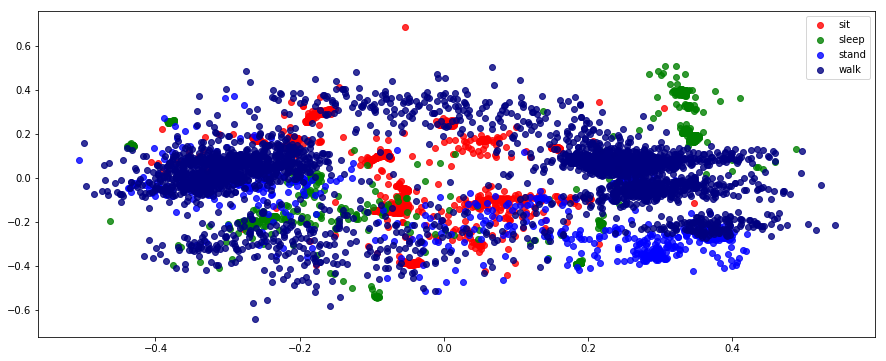

In [39]:
X_pca_p, pca_p = apply_pca(X_all_p, y_all_p, label_list)

## Show Plot for each Activity and Subject

In [40]:
all_subjects = all_patients

plotting  sit
(3, 374)
(3, 374)
(3, 374)
(3, 374)
(3, 374)
(3, 374)


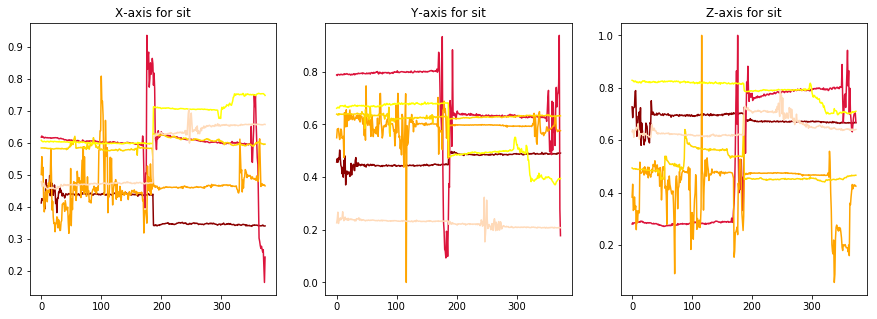

plotting  sleep
(3, 374)
(3, 374)
(3, 372)
(3, 380)
(3, 380)
(3, 373)


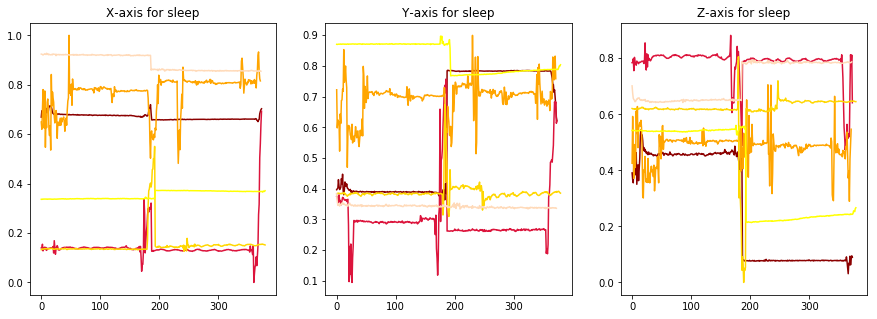

plotting  stand
(3, 573)
(3, 561)
(3, 558)
(3, 561)
(3, 561)
(3, 560)


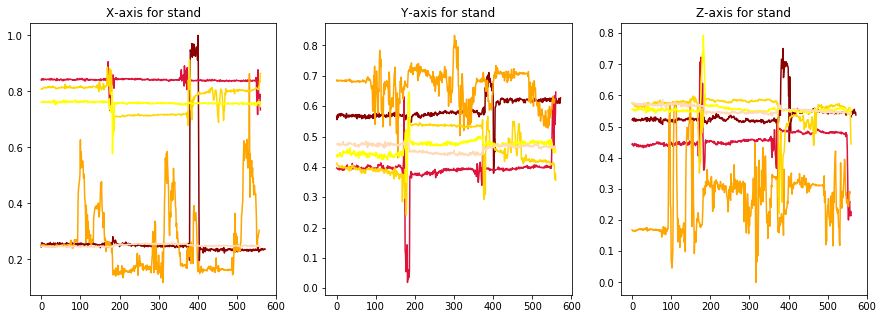

plotting  walk
(3, 386)
(3, 374)
(3, 379)
(3, 373)
(3, 367)
(3, 1248)


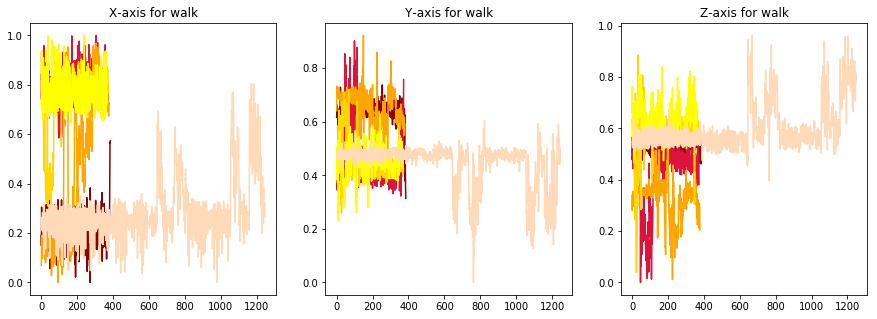

In [41]:
# group X_pca by labels
X_label, y_label = label_grouping(X_all_p, y_all_p, subj_all_p, all_patients, new_label_list)
plot_all_label(X_label, y_all_p, new_label_list, new_label_dict)

# Reshape Data (pure Label)

In [42]:
x_pure, y_pure = prepare_pure_label(X_all_p, y_all_p, subj_all_p, all_patients, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

# Split Train and Test Set

In [43]:
# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x_pure, y_pure, test_size=0.2, random_state=42)

In [44]:
print(x_train.shape)
print(x_test.shape)

(8606, 180)
(2152, 180)


## SVM

In [49]:
%run eval_score.ipynb

In [36]:
svm_model = svm_classifier(x_train, y_train)

In [37]:
y_pred2 = svm_model.predict(x_test)

0.4591078066914498


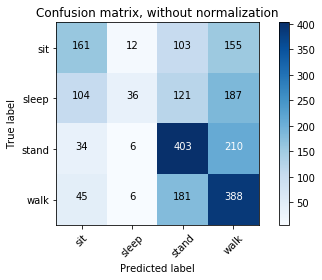

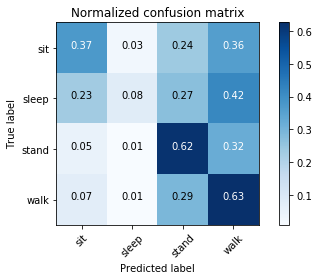

              precision    recall  f1-score   support

         sit       0.47      0.37      0.42       431
       sleep       0.60      0.08      0.14       448
       stand       0.50      0.62      0.55       653
        walk       0.41      0.63      0.50       620

   micro avg       0.46      0.46      0.46      2152
   macro avg       0.49      0.42      0.40      2152
weighted avg       0.49      0.46      0.42      2152



In [38]:
acc = accuracy_score(y_test, y_pred2)
print(acc)

show_conf_matrix(y_test, y_pred2, LABELS)
show_clf_report(y_test, y_pred2, LABELS)

# K-Nearest Neighbors

In [45]:
nn_model = nn_classifier(x_train, y_train, k=6)
print("Finished training")

Finished training


In [46]:
filename = basepath + 'Models/knn_model_patients.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [47]:
y_pred = nn_model.predict(x_test)

## Evaluation

0.8991635687732342


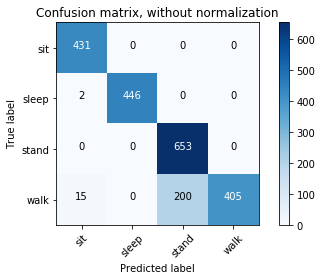

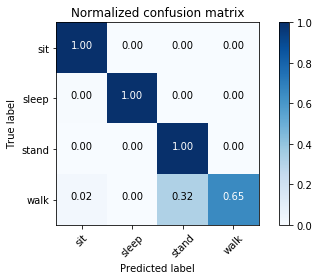

              precision    recall  f1-score   support

         sit       0.96      1.00      0.98       431
       sleep       1.00      1.00      1.00       448
       stand       0.77      1.00      0.87       653
        walk       1.00      0.65      0.79       620

   micro avg       0.90      0.90      0.90      2152
   macro avg       0.93      0.91      0.91      2152
weighted avg       0.92      0.90      0.89      2152



In [50]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

In [51]:
all_test = ['4001']

In [57]:
X_all_p, y_all_p, subj_all_p, ts_all_p, hr_all_p = load_all_data(all_test)

Loading 4001's data
Finished loading


In [58]:
x_test, y_test = prepare_pure_label(X_all_p, y_all_p, subj_all_p, all_test, new_label_list)

In [59]:
y_pred = nn_model.predict(x_test)

0.3656193196572319


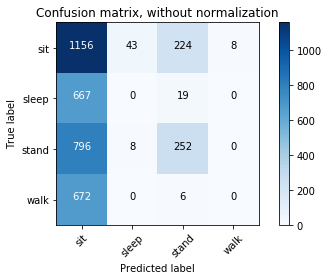

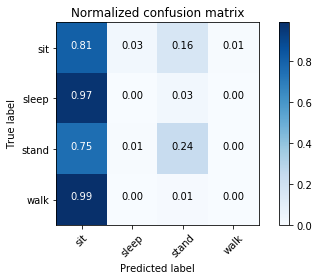

              precision    recall  f1-score   support

         sit       0.35      0.81      0.49      1431
       sleep       0.00      0.00      0.00       686
       stand       0.50      0.24      0.32      1056
        walk       0.00      0.00      0.00       678

   micro avg       0.37      0.37      0.37      3851
   macro avg       0.21      0.26      0.20      3851
weighted avg       0.27      0.37      0.27      3851



In [60]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

# Walk Algorithm

In [ ]:
%run classifier_alg.ipynb

In [ ]:
X_dict = {
    'id': subj_all_p,
    'x': [X_i[0] for X_i in X_all_p],
    'y': [X_i[1] for X_i in X_all_p],
    'z': [X_i[2] for X_i in X_all_p],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca_p],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca_p],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca_p],
    'label': y_all_p
}

df_rpy = pd.DataFrame(X_dict)

In [ ]:
# cols = ['x_pca', 'y_pca', 'z_pca']
cols = ['x','y','z']

df_pca = df_rpy[cols]     # patients

In [ ]:
xyz_pca = np.array(df_pca.to_dict(orient='split')['data'])
dummy_y = np.array([-1 for i in range(len(xyz_pca))])

In [ ]:
xyz_pca, y_temp = make_overlapping(xyz_pca, dummy_y)

In [ ]:
xyz_pca.shape, df_pca.shape

In [ ]:
walk_pred = classify_walk_2(xyz_pca)
walk_pred = np.array(walk_pred)

In [ ]:
walk_pred

In [ ]:
walk_pred = np.array(walk_pred)

walk_pred.shape

In [ ]:
walk_actual = np.array([3 if (df_rpy.loc[i, 'label']==3) else 0 for i in range(len(df_rpy))])

walk_actual.shape

In [ ]:
print(walk_actual)

## Walk Algorithm Evaluation

In [ ]:
walk_lbl = ['NaN','walk']

In [ ]:
acc = accuracy_score(walk_actual[:walk_pred.shape[0]], walk_pred)
print(acc)

show_conf_matrix(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)
show_clf_report(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [ ]:
X_test_new = get_inverse_X(X_test)

X_test_new

In [ ]:
walk_pred = classify_walk_2(X_test_new)

In [ ]:
y_pred_new = combine_2(X_test_new, y_pred)

In [ ]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [46]:
%run test_model.ipynb

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
# filename = basepath + 'Models/knn_model_patients.pkl'
filename = basepath + 'Models/svm_model.pkl'
model = pickle.load(open(filename,'rb'))

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
print(label_list)

['sit', 'sleep', 'stand', 'walk']


In [126]:
all_subjects = [str(i) for i in range(3001,3007)]
df_y_all = call_functions_all(all_subjects,model,label_list)

Loading 3001's data
Finished prediction
        ID               timestamp         x         y         z  label
0     3001 2019-03-05 10:03:24.717  0.244756  0.566141  0.521934  stand
1     3001 2019-03-05 10:03:24.880  0.259021  0.555542  0.523260  stand
2     3001 2019-03-05 10:03:25.039  0.259772  0.570798  0.526133  stand
3     3001 2019-03-05 10:03:25.197  0.253015  0.572885  0.520829  stand
4     3001 2019-03-05 10:03:25.359  0.255830  0.562287  0.518177  stand
5     3001 2019-03-05 10:03:25.522  0.248698  0.572564  0.527901  stand
6     3001 2019-03-05 10:03:25.679  0.256581  0.568871  0.519945  stand
7     3001 2019-03-05 10:03:25.841  0.255267  0.574812  0.519945  stand
8     3001 2019-03-05 10:03:26.000  0.253578  0.575133  0.518177  stand
9     3001 2019-03-05 10:03:26.162  0.253953  0.570316  0.524807  stand
10    3001 2019-03-05 10:03:26.321  0.250387  0.567265  0.517293  stand
11    3001 2019-03-05 10:03:26.484  0.251889  0.574652  0.523481  stand
12    3001 2019-03-05 10

KeyError: nan

In [104]:
print(pca_p)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


Loading 3006's data
Finished prediction
['sit', 'sleep', 'stand', 'walk', 'others']


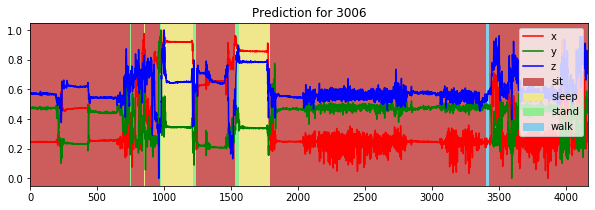

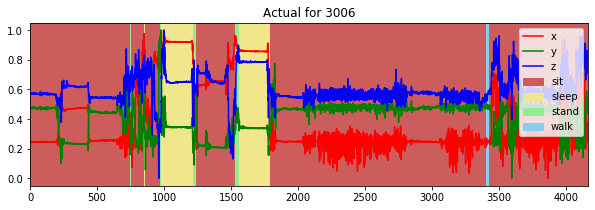

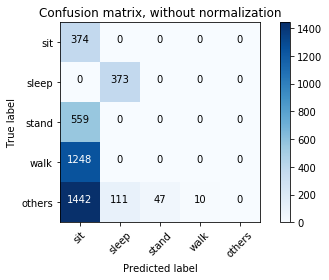

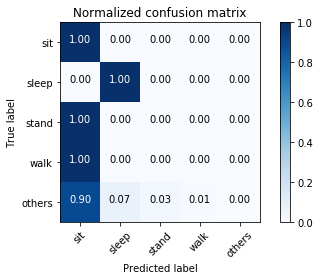

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.10      1.00      0.19       374
       sleep       0.77      1.00      0.87       373
       stand       0.00      0.00      0.00       559
        walk       0.00      0.00      0.00      1248
      others       0.00      0.00      0.00      1610

    accuracy                           0.18      4164
   macro avg       0.17      0.40      0.21      4164
weighted avg       0.08      0.18      0.09      4164

[list([[241, 427], [1255, 1441]]) list([[1014, 1199], [1569, 1755]])
 list([[0, 185], [455, 641], [1850, 2036]])
 list([[2144, 2336], [2362, 2547], [3093, 3359], [3478, 3656], [3708, 3937], [3972, 4164]])
 list([[186, 240], [428, 454], [642, 1013], [1200, 1254], [1442, 1568], [1756, 1849], [2037, 2143], [2337, 2361], [2548, 3092], [3360, 3477], [3657, 3707], [3938, 3971]])]
['sit', 'sleep', 'stand', 'walk', 'others']


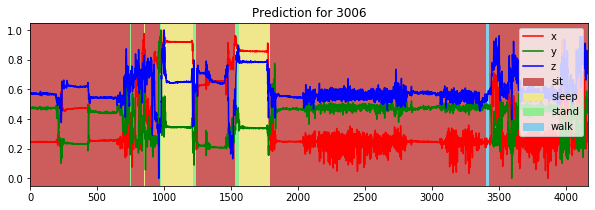

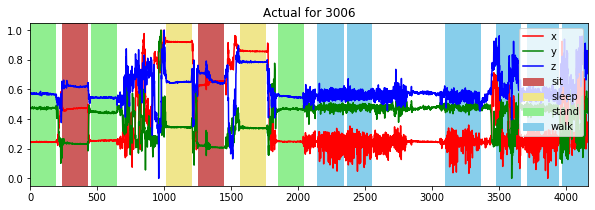

Loading 4004's data
Finished prediction
['sit', 'sleep', 'stand', 'walk', 'others']


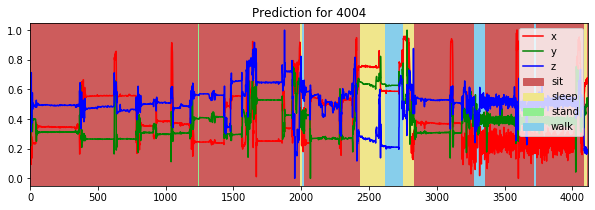

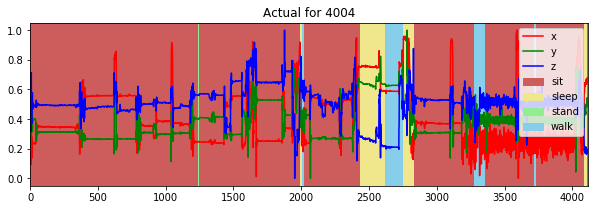

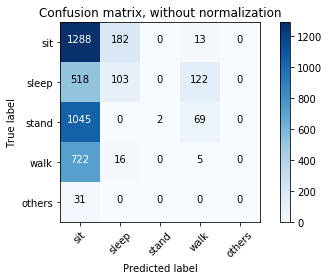

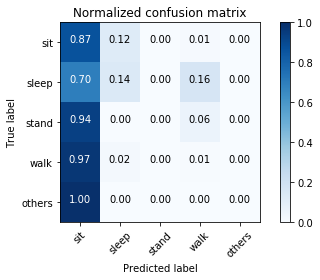

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         sit       0.36      0.87      0.51      1483
       sleep       0.34      0.14      0.20       743
       stand       1.00      0.00      0.00      1116
        walk       0.02      0.01      0.01       743
      others       0.00      0.00      0.00        31

    accuracy                           0.34      4116
   macro avg       0.34      0.20      0.14      4116
weighted avg       0.47      0.34      0.22      4116

[list([[0, 370], [743, 1113], [1517, 1887], [2260, 2630]])
 list([[1888, 2259], [2631, 3001]])
 list([[371, 742], [1114, 1485], [3002, 3373]]) list([[3374, 4116]])
 list([[1486, 1516]])]
['sit', 'sleep', 'stand', 'walk', 'others']


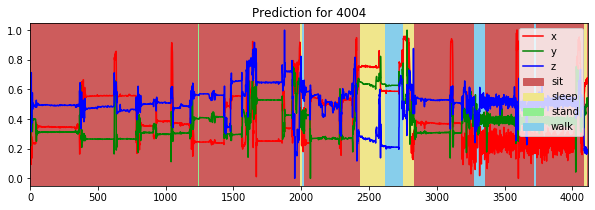

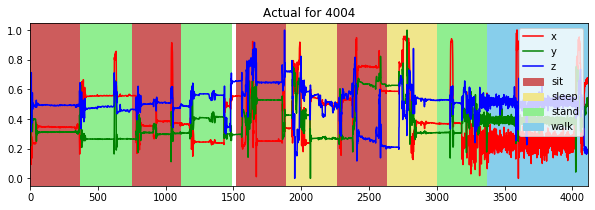

In [48]:
all_subjects = ['3006','4004']
df_y_each = call_functions(all_subjects,model, label_list)

In [84]:
s = '3004'
print("Loading {0}'s data".format(s))

df_sid = load_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca_p)
df_y = predict_combine(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

Loading 3004's data


KeyError: 'finish'

In [82]:
cols = ['x','y','z']
df_y_each

({'sit':        ID               timestamp         x         y         z
  0    3006 2019-01-16 13:59:26.666  0.478149  0.226299  0.632528
  1    3006 2019-01-16 13:59:26.827  0.465091  0.240877  0.639909
  2    3006 2019-01-16 13:59:26.987  0.461778  0.266728  0.630313
  3    3006 2019-01-16 13:59:27.147  0.464896  0.223772  0.611367
  4    3006 2019-01-16 13:59:27.309  0.466066  0.237378  0.633512
  5    3006 2019-01-16 13:59:27.469  0.474641  0.236600  0.638187
  6    3006 2019-01-16 13:59:27.631  0.462168  0.245347  0.644092
  7    3006 2019-01-16 13:59:27.790  0.463922  0.237767  0.639171
  8    3006 2019-01-16 13:59:27.950  0.459050  0.242237  0.649013
  9    3006 2019-01-16 13:59:28.111  0.457491  0.245347  0.648275
  10   3006 2019-01-16 13:59:28.272  0.456516  0.268283  0.662791
  11   3006 2019-01-16 13:59:28.434  0.454178  0.242820  0.634988
  12   3006 2019-01-16 13:59:28.593  0.456516  0.234462  0.604232
  13   3006 2019-01-16 13:59:28.755  0.458660  0.237767  0.614566
  1

In [75]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y_all[df_y_all['y_pred']!=-1]
df_y_notnull = df_y_notnull.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

print(df_y_notnull.shape)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
show_clf_report(actual_y, pred_y, LABELS)

label_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, label_list, output_dict=True)
print(report['macro avg'])

KeyError: 'y_pred'

# Display Table

In [2]:
from prettytable import PrettyTable

In [83]:
# print(s)
df_y = df_y_each.copy()

df_y[:200]

AttributeError: 'tuple' object has no attribute 'copy'

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
        
    keep_lb = df_y.loc[keep]['y_pred']

    if(keep_lb!=df_y.loc[i]['y_pred']):
        label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                             df_y.loc[i-1]['y_pred']])

        period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

        keep = i

In [ ]:
actual_label_period = []
actual_period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y_notnull)):
#     if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=
#        calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
#        calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=
#        calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
    keep_lb = df_y_notnull.loc[keep]['y_actual']

    if(keep_lb!=df_y_notnull.loc[i]['y_actual']):
        actual_label_period.append([df_y_notnull.loc[keep]['timestamp'], df_y_notnull.loc[i-1]['timestamp'], 
                             df_y_notnull.loc[i-1]['y_actual']])

        actual_period_list[df_y_notnull.loc[i-1]['y_actual']].append([df_y_notnull.loc[keep]['timestamp'],
                                                                    df_y_notnull.loc[i-1]['timestamp']])

        keep = i

In [ ]:
label_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], label_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(label_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(label_list)):
    activity_changes.append([label_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive Count (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([label_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in label_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(label_list)):
    lb = label_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in label_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in label_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

In [ ]:
actual_label_cnt_list = [0 for i in range(len(label_list))]
for lb_p in actual_label_period:
    label_i = lb_p[2]
    
    actual_label_cnt_list[label_i] += 1

In [ ]:
total_secs = []
for i in range(len(actual_period_list)):    
    secs = 0
    for p_i in actual_period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tabl = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tabl.add_row([label_list[i], convert_time_to_string(total_secs[i]), 
                  percent_secs[i], actual_label_cnt_list[i]])

tabl.add_row(['', '', '',''])
tabl.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(actual_label_period)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 1 Hour

In [ ]:
fivemin = 60*60
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

# print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    start = calc_sec(prd[s_idx].split(' ')[1])
    finish = calc_sec(prd[f_idx].split(' ')[1])
    
    if(finish>=tm_f and
      start-(start%fivemin)==tm_s):
            
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
    
    elif(start-(start%fivemin)==tm_s and
        finish-(finish%fivemin)+fivemin==tm_f):
        new_label_period.append(prd)
        
    while(finish>=tm_f):
        tm_s += fivemin
        tm_f += fivemin
                
    if(start<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and 
           calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin and
           prd[lb_idx]!=-1
          ):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append([convert_time_to_string(i) for i in period_lb])

In [ ]:
all_periods_label

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=label_list)

df_all['from'] = pd.Series([calc_ts(i) for i in range(int(floor_start), int(ceil_finish), fivemin)])
df_all['to'] = pd.Series([calc_ts(i+fivemin) for i in range(int(floor_start), int(ceil_finish), fivemin)])

In [ ]:
df_all

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[label_list[i]].apply(lambda x: calc_sec('0:' + x)/60),
            width,
            alpha=0.5,
            color=colors[i],
            label=label_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (min)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()